In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
df=pd.read_csv("concrete_data.csv")

In [3]:
df.head()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.columns

Index(['cement', 'blast_furnace_slag', 'fly_ash', 'water', 'superplasticizer',
       'coarse_aggregate', 'fine_aggregate ', 'age',
       'concrete_compressive_strength'],
      dtype='object')

In [6]:
df.isnull().sum()

cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64

In [7]:
df.corr()

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
blast_furnace_slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
fly_ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
coarse_aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
fine_aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
concrete_compressive_strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


Text(0.5, 1.0, 'correlation among the columns')

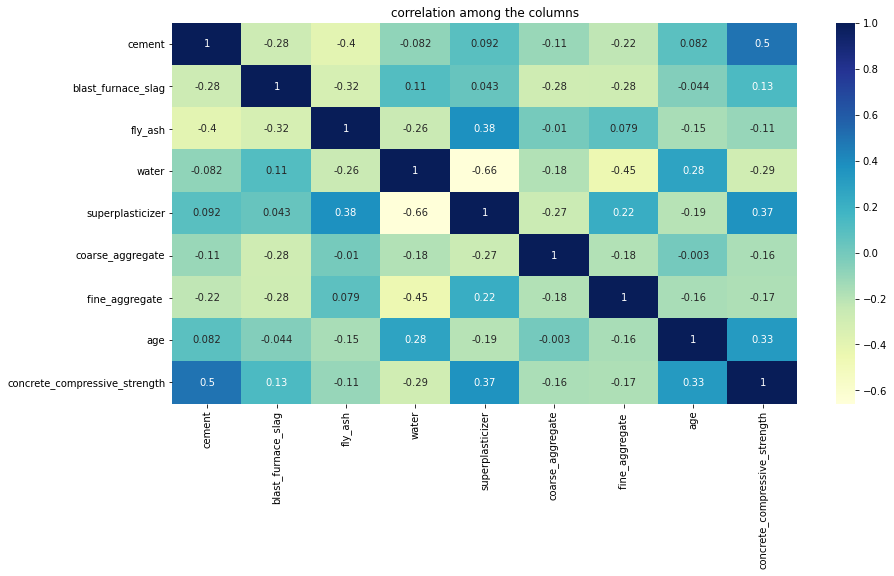

In [8]:
plt.figure(figsize=(14,7))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.title("correlation among the columns")

<AxesSubplot:xlabel='concrete_compressive_strength', ylabel='age'>

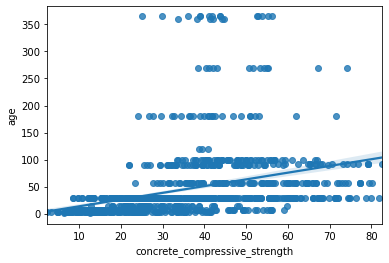

In [9]:
sns.regplot(x=df['concrete_compressive_strength'], y=df['age'])

Text(0.5, 1.0, 'age vs concrete_compressive_strength')

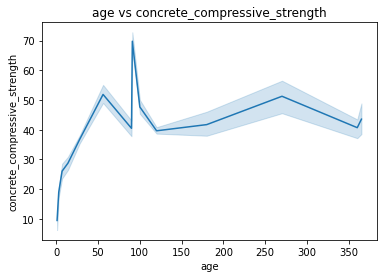

In [10]:
sns.lineplot(y=df['concrete_compressive_strength'],x=df['age'])
plt.title("age vs concrete_compressive_strength")

<AxesSubplot:xlabel='cement', ylabel='Density'>

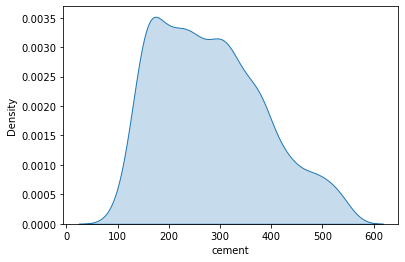

In [11]:
# KDE plots for each species
sns.kdeplot(data=df['cement'], label="cement", shade=True)

<AxesSubplot:xlabel='blast_furnace_slag', ylabel='Density'>

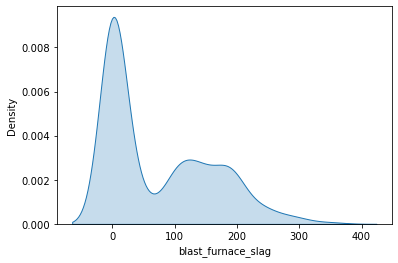

In [12]:
sns.kdeplot(data=df['blast_furnace_slag'], label="blast_furnace_slag", shade=True)

<AxesSubplot:xlabel='water', ylabel='Density'>

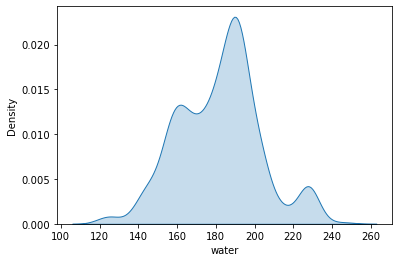

In [13]:
sns.kdeplot(data=df['water'], label="water", shade=True)

<AxesSubplot:xlabel='fly_ash', ylabel='Density'>

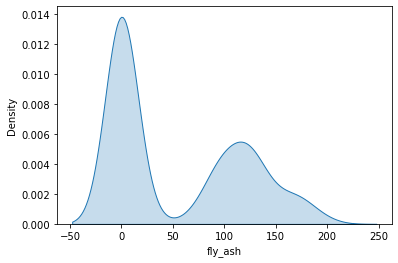

In [14]:
sns.kdeplot(data=df['fly_ash'], label="fly_ash", shade=True)

<AxesSubplot:xlabel='age', ylabel='Density'>

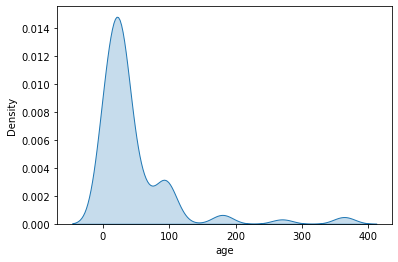

In [15]:
sns.kdeplot(data=df['age'], label="age", shade=True)

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

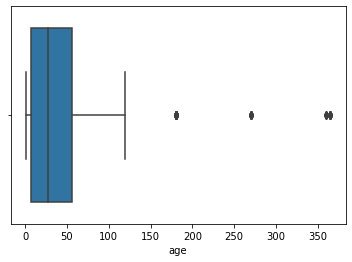

In [16]:
sns.boxplot(df['age'])

In [17]:
out=[]
def iqr_outliers(df,name):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("\nOutliers of",name,":",out)
for i in df.columns:
    iqr_outliers(df[i],i)


Outliers of cement : []

Outliers of blast_furnace_slag : [359.4, 359.4]

Outliers of fly_ash : [359.4, 359.4]

Outliers of water : [359.4, 359.4, 121.8, 121.8, 121.8, 121.8, 121.8, 237.0, 247.0, 246.9, 236.7]

Outliers of superplasticizer : [359.4, 359.4, 121.8, 121.8, 121.8, 121.8, 121.8, 237.0, 247.0, 246.9, 236.7, 32.2, 28.2, 32.2, 28.2, 32.2, 28.2, 32.2, 28.2, 32.2, 28.2]

Outliers of coarse_aggregate : [359.4, 359.4, 121.8, 121.8, 121.8, 121.8, 121.8, 237.0, 247.0, 246.9, 236.7, 32.2, 28.2, 32.2, 28.2, 32.2, 28.2, 32.2, 28.2, 32.2, 28.2]

Outliers of fine_aggregate  : [359.4, 359.4, 121.8, 121.8, 121.8, 121.8, 121.8, 237.0, 247.0, 246.9, 236.7, 32.2, 28.2, 32.2, 28.2, 32.2, 28.2, 32.2, 28.2, 32.2, 28.2, 992.6, 992.6, 992.6, 992.6, 992.6]

Outliers of age : [359.4, 359.4, 121.8, 121.8, 121.8, 121.8, 121.8, 237.0, 247.0, 246.9, 236.7, 32.2, 28.2, 32.2, 28.2, 32.2, 28.2, 32.2, 28.2, 32.2, 28.2, 992.6, 992.6, 992.6, 992.6, 992.6, 270, 365, 360, 365, 270, 365, 180, 180, 180, 365, 270

In [18]:
def drop_outliers(df,field_name):
    iqr = 1.5 * (np.percentile(df[field_name], 75) - np.percentile(df[field_name], 25))
    df.drop(df[df[field_name] > (iqr + np.percentile(df[field_name], 75))].index, inplace=True)
    df.drop(df[df[field_name] < (np.percentile(df[field_name], 25) - iqr)].index, inplace=True)
drop_outliers(df,'blast_furnace_slag')
drop_outliers(df,'fly_ash')
drop_outliers(df,'water')
drop_outliers(df,'superplasticizer')
drop_outliers(df,'coarse_aggregate')

C:\Users\sanje\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

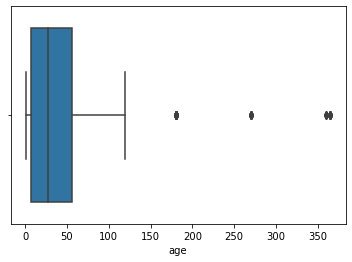

In [19]:
sns.boxplot(df['age'])

In [20]:
out=[]
def iqr_outliers(df,name):
    q1 = df.quantile(0.25)
    q3 = df.quantile(0.75)
    iqr = q3-q1
    Lower_tail = q1 - 1.5 * iqr
    Upper_tail = q3 + 1.5 * iqr
    for i in df:
        if i > Upper_tail or i < Lower_tail:
            out.append(i)
    print("\nOutliers of",name,":",out)
for i in df.columns:
    iqr_outliers(df[i],i)


Outliers of cement : []

Outliers of blast_furnace_slag : []

Outliers of fly_ash : []

Outliers of water : []

Outliers of superplasticizer : []

Outliers of coarse_aggregate : []

Outliers of fine_aggregate  : [594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 992.6, 992.6, 992.6, 992.6, 992.6]

Outliers of age : [594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 594.0, 992.6, 992.6, 992.6, 992.6, 992.6, 270, 365, 360, 365, 270, 365, 180, 180, 180, 365, 270, 270, 180, 365, 365, 180, 270, 365, 270, 180, 365, 365, 180, 180, 180, 180, 365, 180, 270, 270, 270, 180, 270, 360, 180, 365, 180, 365, 180, 360, 180, 365, 180, 365, 180, 270, 180, 180, 360, 180, 360, 180, 180, 180, 270, 1

In [21]:
df.shape

(1009, 9)

<AxesSubplot:xlabel='coarse_aggregate', ylabel='Density'>

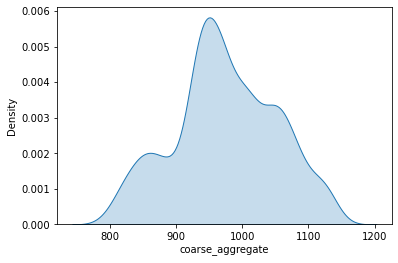

In [22]:
sns.kdeplot(data=df['coarse_aggregate'], label="coarse_aggregate", shade=True)

In [23]:
x=df.drop(["concrete_compressive_strength"],axis=1)
x

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [24]:
y=df['concrete_compressive_strength']
y

0       79.99
1       61.89
2       40.27
3       41.05
4       44.30
        ...  
1025    44.28
1026    31.18
1027    23.70
1028    32.77
1029    32.40
Name: concrete_compressive_strength, Length: 1009, dtype: float64

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [26]:
x_train

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age
450,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,56
854,287.0,121.0,94.0,188.0,9.0,904.0,696.0,28
998,304.8,0.0,99.6,196.0,9.8,959.4,705.2,28
424,173.5,50.1,173.5,164.8,6.5,1006.2,793.5,14
564,158.8,238.2,0.0,185.7,0.0,1040.6,734.3,28
...,...,...,...,...,...,...,...,...
108,379.5,151.2,0.0,153.9,15.9,1134.3,605.0,7
216,190.3,0.0,125.2,161.9,9.9,1088.1,802.6,28
713,157.0,236.0,0.0,192.0,0.0,935.4,781.2,3
134,362.6,189.0,0.0,164.9,11.6,944.7,755.8,28


In [27]:
y_train

450    53.77
854    41.94
998    30.12
424    33.01
564    21.07
       ...  
108    47.10
216    28.47
713     9.69
134    71.30
372    37.27
Name: concrete_compressive_strength, Length: 706, dtype: float64

In [29]:
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso,Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score

In [56]:
Model_Names=["Linear Regression","Lasso","Ridge","RandomForestRegressor","DecisionTreeRegressor"]
Scores=[]

In [57]:
model1=LinearRegression()
model1.fit(x_train,y_train)
y_head=model1.predict(x_test)
Scores.append(r2_score(y_test,y_head))

In [58]:
model2=Lasso()
model2.fit(x_train,y_train)
y_head=model2.predict(x_test)
Scores.append(r2_score(y_test,y_head))

In [59]:
model3=Ridge()
model3.fit(x_train,y_train)
y_head=model3.predict(x_test)
Scores.append(r2_score(y_test,y_head))

In [60]:
model4=RandomForestRegressor(n_estimators=100,random_state=42)
model4.fit(x_train,y_train)
y_head=model4.predict(x_test)
Scores.append(r2_score(y_test,y_head))
r2_score(y_test,y_head)

0.9044150681338039

In [61]:
model5=DecisionTreeRegressor()
model5.fit(x_train,y_train)
y_head=model5.predict(x_test)
Scores.append(r2_score(y_test,y_head))

In [65]:
v=pd.DataFrame({'Model_Names':Model_Names,'Scores':Scores})

<AxesSubplot:xlabel='Model_Names', ylabel='Scores'>

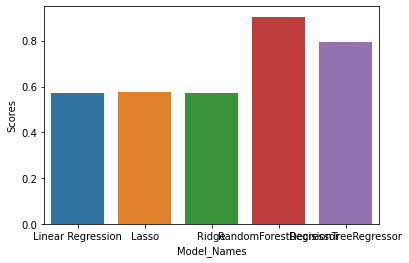

In [66]:
sns.barplot(x=v['Model_Names'],y=v['Scores'])

In [67]:
model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [68]:
y_pred=model.predict(x_test)
y_pred

array([15.884     , 41.4556    , 37.2246    , 44.805905  , 15.8558    ,
       40.0993    , 45.47401667, 39.7971    , 65.1822    , 42.0082    ,
       22.1575    , 31.2837    , 28.4361    , 25.6002    , 48.9864    ,
       55.4658    , 16.1924    , 36.8766    , 32.0125    , 36.7993    ,
       52.55116667, 60.707975  , 34.2024    , 41.5881    , 38.3504    ,
       32.32428333, 11.1705    , 27.8939    , 77.204     ,  5.0691    ,
       43.6694    , 36.3635    , 11.2701    , 12.4797    , 21.7737    ,
       51.2842    , 54.0257    , 35.0586    , 16.153     , 53.0464    ,
       49.9873    , 20.0036    , 33.4485    , 37.6119    , 40.3167    ,
       38.506975  , 38.3837    , 39.7352    , 50.4489    , 38.4206    ,
       15.394     , 23.8486    , 19.6328    , 19.6083    , 11.7205    ,
       17.7929    , 52.4449    , 39.2554    , 39.8171    , 31.0046    ,
       16.8506    , 34.9195    , 17.2656    , 47.0538    , 63.69975417,
       41.2382    , 64.378     , 14.9909    , 32.7641    , 29.20

In [69]:
r2_score(y_test,y_pred)

0.9044150681338039

In [39]:
#optimisation

In [70]:
from sklearn.model_selection import GridSearchCV

In [71]:
forest_params = [{'n_estimators':[100,200,300,50],'random_state':[42,33,51,67]}]

In [72]:
clf = GridSearchCV(model4, forest_params, cv = 10, scoring='r2')
clf.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'n_estimators': [100, 200, 300, 50],
                          'random_state': [42, 33, 51, 67]}],
             scoring='r2')

In [73]:
print(clf.best_params_)

{'n_estimators': 300, 'random_state': 42}


In [78]:
model4=RandomForestRegressor(n_estimators=300,random_state=42)
model4.fit(x_train,y_train)
y_head=model4.predict(x_test)
Scores.append(r2_score(y_test,y_head))
print(r2_score(y_test,y_head))

0.9064103133128946


In [79]:
import pickle
file=open('concrete_model.pkl','wb')
pickle.dump(model4,file)